In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


#Import Thư Viện

In [ ]:
#Import required libraries
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
import cv2
from math import sin, cos, pi

In [ ]:
dir_train_csv = '/content/gdrive/MyDrive/Face Keypoints/Đồ án/facial-keypoints-detection/training/training.csv'
dir_test_csv = '/content/gdrive/MyDrive/Face Keypoints/Đồ án/facial-keypoints-detection/test/test.csv'

train_data = pd.read_csv(dir_train_csv)
test_data = pd.read_csv(dir_test_csv)

print("Length of train data:", len(train_data))
print("Length of train data:", len(test_data))


Length of train data: 7049
Length of train data: 1783


In [ ]:
#Show sample training data 
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [ ]:
# Now we deal with missing value
print("The number of missing values for each column:")
print(train_data.isnull().sum())

The number of missing values for each column:
left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mo

In [ ]:
def prep_x_y (train):
    """
    Function to extract X and y from training set:
    INPUT:
        train: dataframe with shape (n,31)
    OUTPUT:
        X: numpy array which contains image data, shape (n,96,96,1)
        y: numpy array with shape (n, 30)
    """
    imgs = []
    pnts = []
    
    n = train.shape[0]
    
    X_tr = train['Image'] # X part
    y_tr = train.drop('Image',axis = 1) # y part
    
    for i in range(n):
        img = X_tr.iloc[i]
        img = img.split(' ')
        imgs.append(img)
        
        pnt = y_tr.iloc[i,:] # take the ith row data
        pnts.append(pnt)

    X_train = np.array(imgs,dtype = 'float')
    X_train = X_train.reshape(-1,96,96,1)
    y_train = np.array(pnts,dtype = 'float')
    X_train = X_train / 255.0
    
    return X_train, y_train

In [ ]:
train_drop = train_data.dropna()
X_drop, y_drop = prep_x_y(train_drop)

print("Training datapoint shape: X_drop.shape:{}".format(X_drop.shape))
print("Training labels shape: y_drop.shape:{}".format(y_drop.shape))

train_fill = train_data.fillna(method = 'ffill')
X_fill, y_fill = prep_x_y(train_fill)

print("Training datapoint shape: X_fill.shape:{}".format(X_fill.shape))
print("Training labels shape: y_fill.shape:{}".format(y_fill.shape))



Training datapoint shape: X_drop.shape:(2140, 96, 96, 1)
Training labels shape: y_drop.shape:(2140, 30)
Training datapoint shape: X_fill.shape:(7049, 96, 96, 1)
Training labels shape: y_fill.shape:(7049, 30)


In [ ]:
def plot_images(images, points, ncols, shrinkage=0.2):
  """
  Function to plot images and their lables:
  INPUT:
      images: numpy array with shape (N, d, d, c) dtype=float
      points: numpy array with shape (N,), dtype=float
      ncols: number of columns in the resulting image grid
      shrinage: how much each image to be shrinked for display
  """
  
  nindex, height, width, intensity = images.shape
  nrows = nindex//ncols
  print(f"Number of rows: {nrows}, number of cols: {ncols}")
  
  fig_width = int(width*ncols*shrinkage)
  fig_height = int(height*nrows*shrinkage)

  fig, axes = plt.subplots(nrows, ncols, 
                          figsize=(fig_width, fig_height))
  print(f"Figure width: {fig_width}, height: {fig_height}")
  axes = axes.flatten()
  
  for k in range(nindex):
    img = images[k]
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    pnt_x = [points[k][2*j] for j in range(15)]
    pnt_y = [points[k][2*j+1] for j in range(15)]
    ax.scatter(pnt_x,pnt_y,s=50,c='r')
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

Number of rows: 2, number of cols: 6
Figure width: 57, height: 19


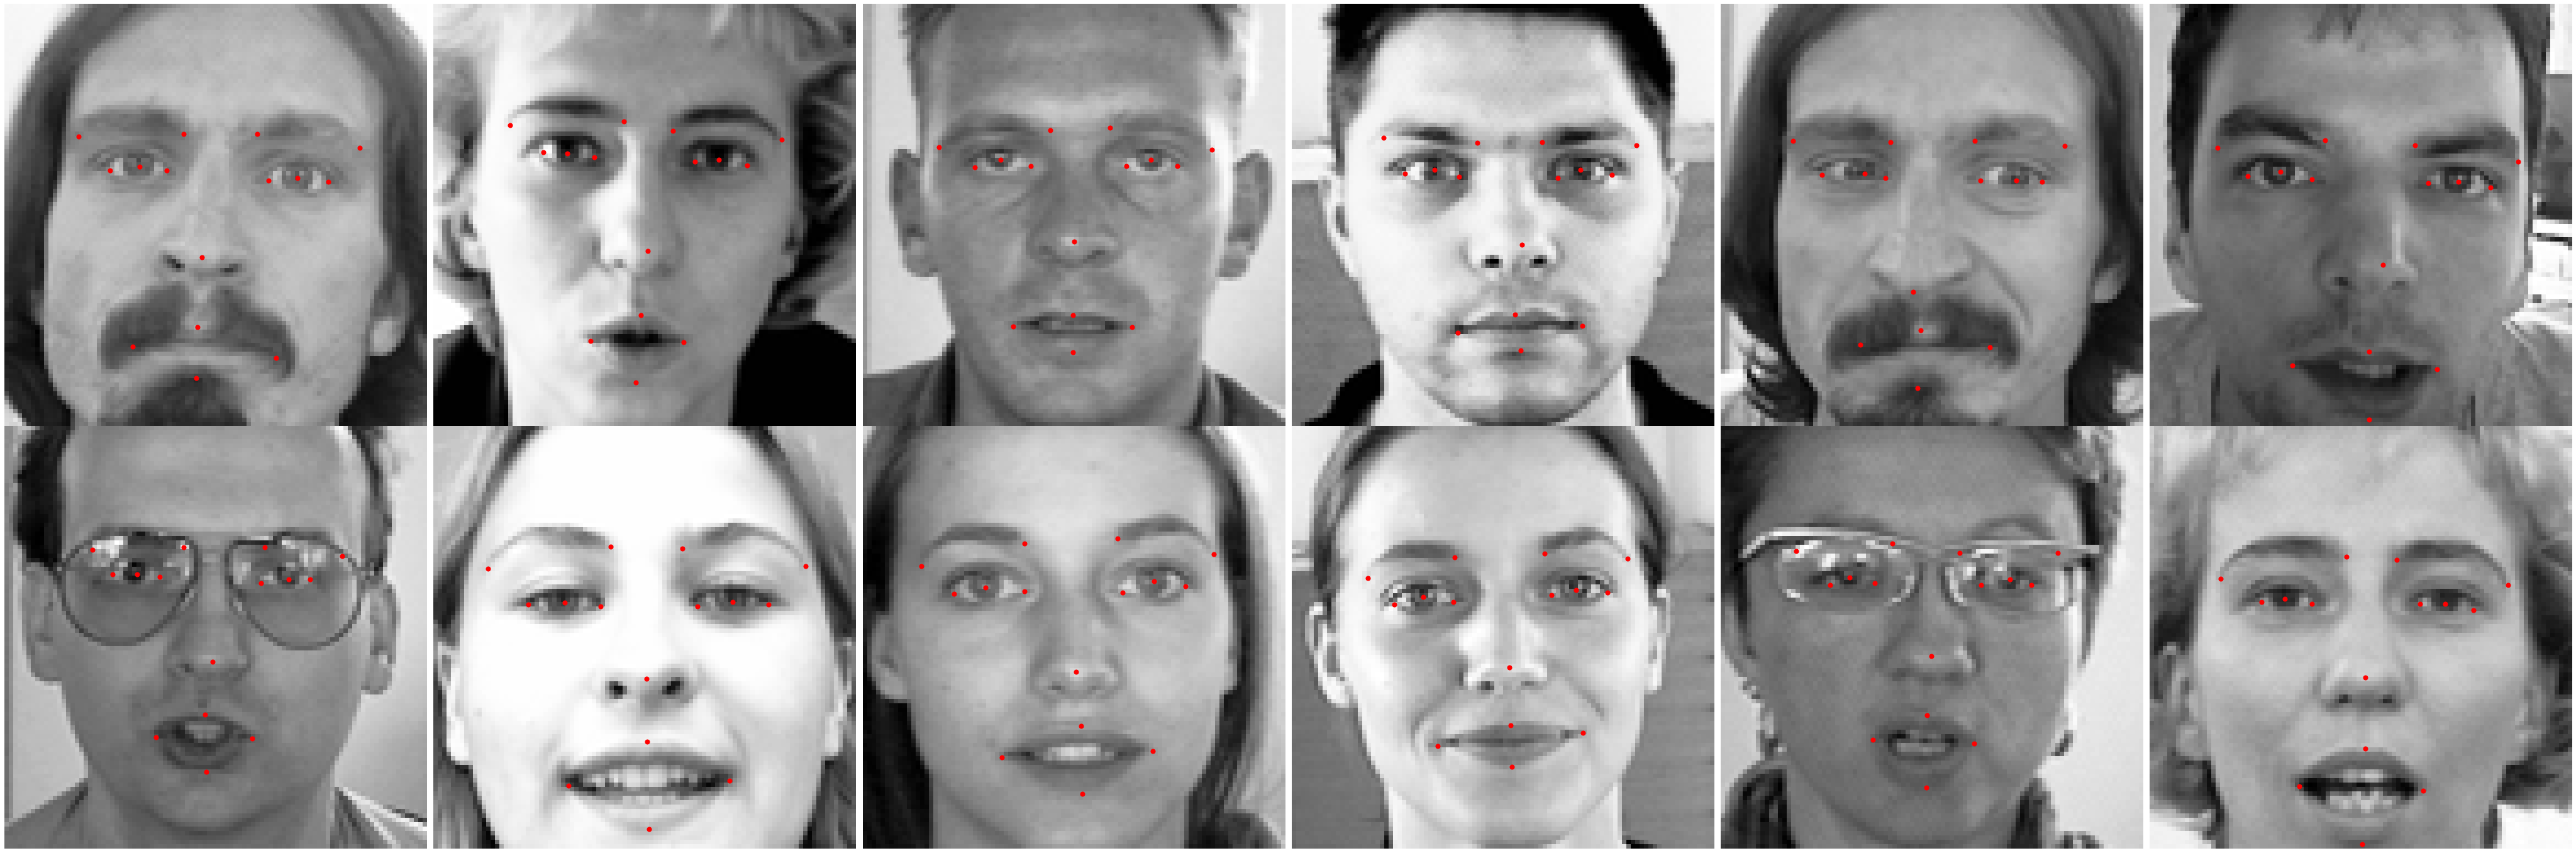

In [ ]:
plot_images(X_drop[:12], y_drop[:12], 6, shrinkage=0.1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Flatten, Conv2D, LeakyReLU, GlobalAveragePooling2D, MaxPooling2D, Dropout, Dense
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50

model = tf.keras.models.Sequential()
pretrained_model = ResNet50(input_shape=(96,96,3), include_top=False, weights='imagenet')
pretrained_model.trainable = True

model.add(Conv2D(3, (1,1), padding='same', input_shape=(96,96,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(pretrained_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(30))
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 3)         6         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 3)         0         
                                                                 
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 30)                61

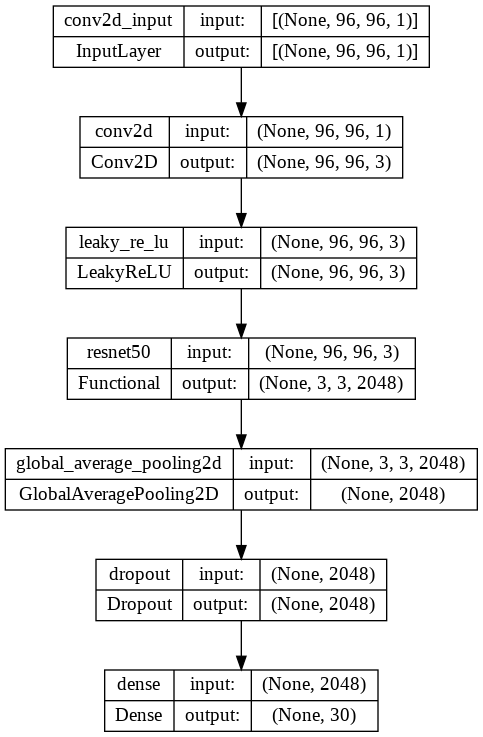

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 49.6 MB/s eta 0:00:00


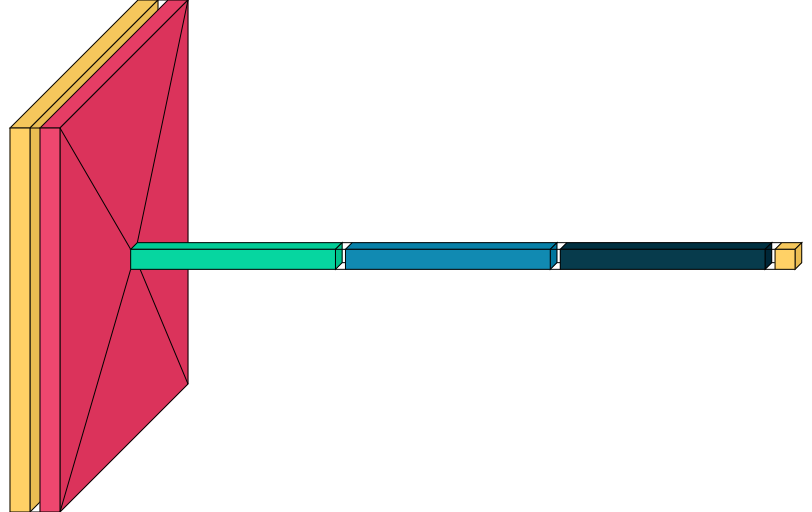

In [ ]:
import visualkeras
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

visualkeras.layered_view(model)

In [ ]:
# Define callbacks

# Early stopping if no improvement
early_stop = EarlyStopping(monitor = 'loss', 
                           patience = 30, 
                           mode = 'min',
                           baseline=None)

# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', 
                              factor = 0.7,
                              patience = 5, 
                              min_lr = 1e-15,
                              mode = 'min', 
                              verbose = 1)



checkpointer = ModelCheckpoint(filepath='checkpoint1.hdf5', 
                               verbose=1, save_best_only=True)
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
history=model.fit(x=X_drop,
                  y=y_drop,
                  epochs=200,
                  batch_size=64,
                  validation_split=0.15,
                  callbacks=[early_stop,reduce_lr,checkpointer])
model.save('model3.h5')

Epoch 1/200
29/29 [==============================] - ETA: 0s - loss: 774.4830 - accuracy: 0.0731
Epoch 1: val_loss improved from inf to 21394.80078, saving model to checkpoint1.hdf5
29/29 [==============================] - 26s 274ms/step - loss: 774.4830 - accuracy: 0.0731 - val_loss: 21394.8008 - val_accuracy: 0.0561 - lr: 0.0010
Epoch 2/200
29/29 [==============================] - ETA: 0s - loss: 16.7754 - accuracy: 0.7191
Epoch 2: val_loss improved from 21394.80078 to 1138.31519, saving model to checkpoint1.hdf5
29/29 [==============================] - 6s 193ms/step - loss: 16.7754 - accuracy: 0.7191 - val_loss: 1138.3152 - val_accuracy: 0.4081 - lr: 0.0010
Epoch 3/200
29/29 [==============================] - ETA: 0s - loss: 8.5919 - accuracy: 0.7565
Epoch 3: val_loss improved from 1138.31519 to 646.61688, saving model to checkpoint1.hdf5
29/29 [==============================] - 6s 201ms/step - loss: 8.5919 - accuracy: 0.7565 - val_loss: 646.6169 - val_accuracy: 0.4112 - lr: 0.0010


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

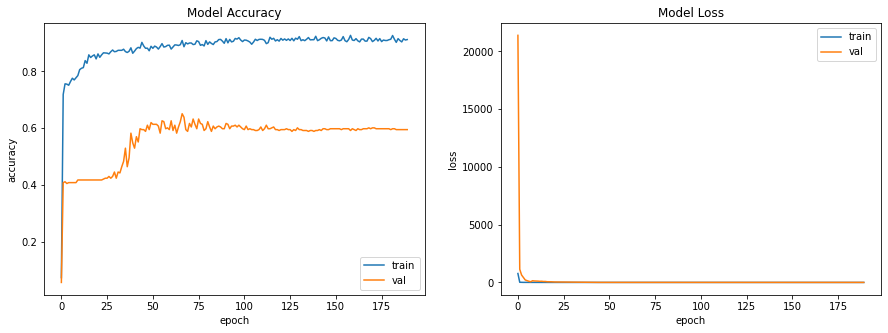

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'val'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'val'])

In [ ]:
history=model.fit(x=X_fill,
                  y=y_fill,
                  epochs=200,
                  batch_size=64,
                  validation_split=0.15,
                  callbacks=[early_stop,reduce_lr,checkpointer])
model.save('model4.h5')

Epoch 1/200
94/94 [==============================] - ETA: 0s - loss: 12.4895 - accuracy: 0.5508
Epoch 1: val_loss did not improve from 4.40464
94/94 [==============================] - 17s 182ms/step - loss: 12.4895 - accuracy: 0.5508 - val_loss: 15.8544 - val_accuracy: 0.5406 - lr: 9.3875e-08
Epoch 2/200
94/94 [==============================] - ETA: 0s - loss: 11.9660 - accuracy: 0.5528
Epoch 2: val_loss did not improve from 4.40464
94/94 [==============================] - 15s 161ms/step - loss: 11.9660 - accuracy: 0.5528 - val_loss: 15.2110 - val_accuracy: 0.5350 - lr: 9.3875e-08
Epoch 3/200
94/94 [==============================] - ETA: 0s - loss: 11.5464 - accuracy: 0.5615
Epoch 3: val_loss did not improve from 4.40464
94/94 [==============================] - 16s 168ms/step - loss: 11.5464 - accuracy: 0.5615 - val_loss: 14.7059 - val_accuracy: 0.5350 - lr: 9.3875e-08
Epoch 4/200
94/94 [==============================] - ETA: 0s - loss: 11.2498 - accuracy: 0.5657
Epoch 4: val_loss did 

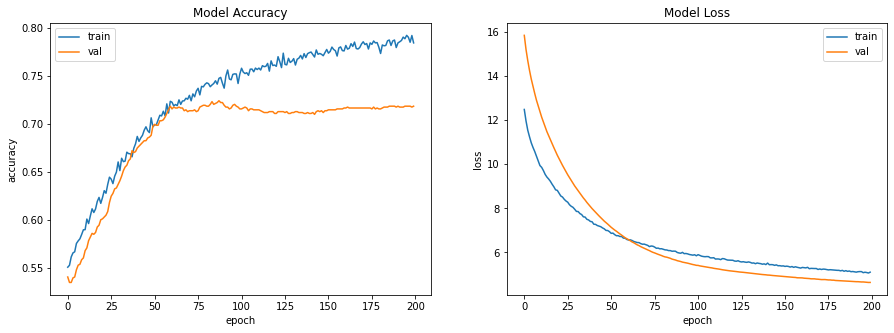

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set(xlabel='epoch', ylabel='accuracy')
ax1.legend(['train', 'val'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(['train', 'val'])